# Diabetes Regression 


Analyse exploratoire check-list:
- Identification de la target
- Dimension de la dataset
- Type de données et leurs comprehension (recherche sur internet si necessaire)
- Identification des valeurs manquantes (les NANs) et outliers
- Visualisation de la target et relation entre target et features (histogram, scatter, boxplot...)





Preprocessing : 
- Encodage in case la data n'est pas numerique (characters)
- Normalisation des donnees
- Spliting data into train and test sets
- Eliminations des NANs et outliers du train set (dropna, imputation ...)
- Feature selection (depending on the exploratory data analysis)


In [37]:
# importing libraries for :

# dataset and machine learning model that will be used
from sklearn import datasets, linear_model

# visualisation 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# data splitting and learning curve (to detect overfitting)
from sklearn.model_selection import train_test_split, learning_curve

#metrics for evaluation 
from sklearn.metrics import r2_score


In [38]:
# loading dataset
diab = datasets.load_diabetes()
diab.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [47]:
# exploring the content of the dataset
print(diab['feature_names'])
diab['DESCR']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [48]:
# creating the dataframe that will be used and exploring it
data = diab['data']
target = diab['target']
df = pd.DataFrame(data, columns = diab['feature_names'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [49]:
# a sumup about the statistical information of the different features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.639623e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.309912e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.013951e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.289818e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-9.042540e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.301121e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.563971e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.863174e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.848103e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.398488e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [51]:
# searching if there is NAN values
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

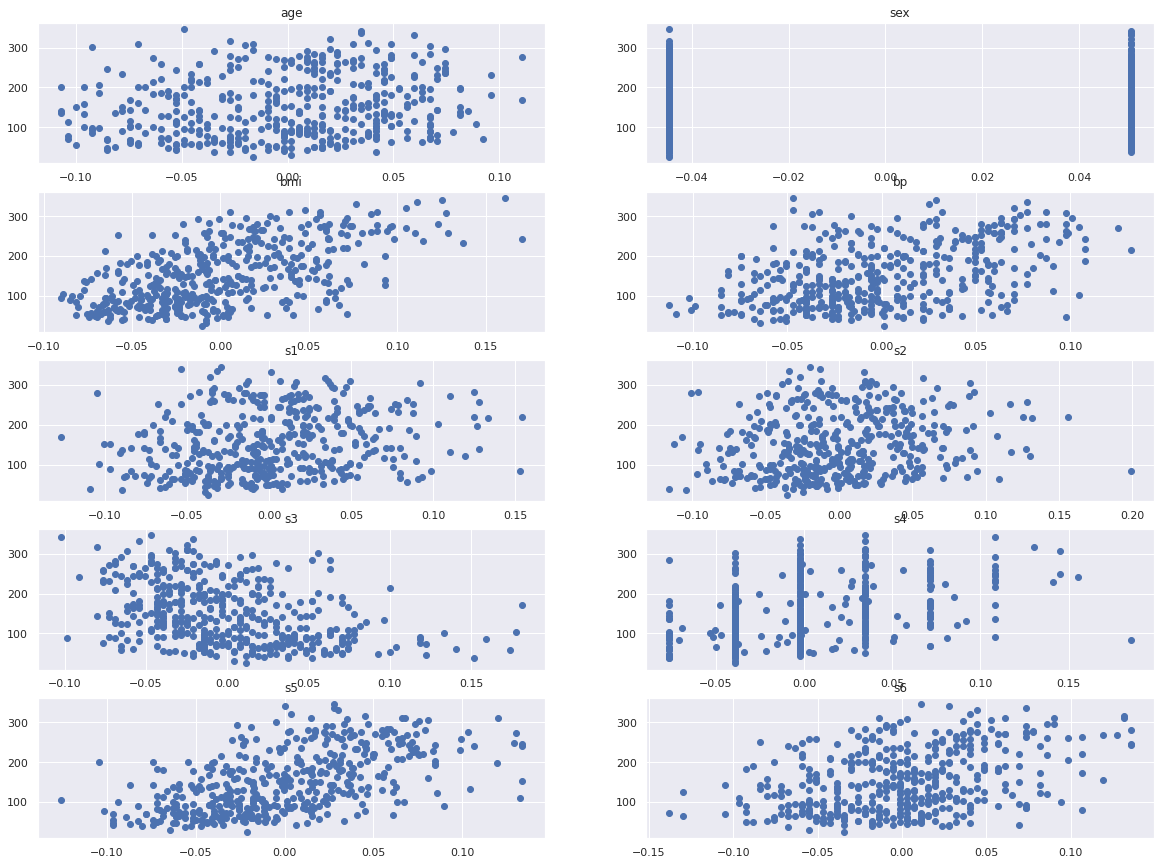

In [53]:
# Visualization of the variation of the target based on each feature
plt.figure(figsize=(20,15))
for i,j in zip(range(1,11), diab['feature_names'])  :
  plt.subplot(5,2,i)
  plt.scatter(df[j], target)
  plt.title(j)
plt.show()


<AxesSubplot:>

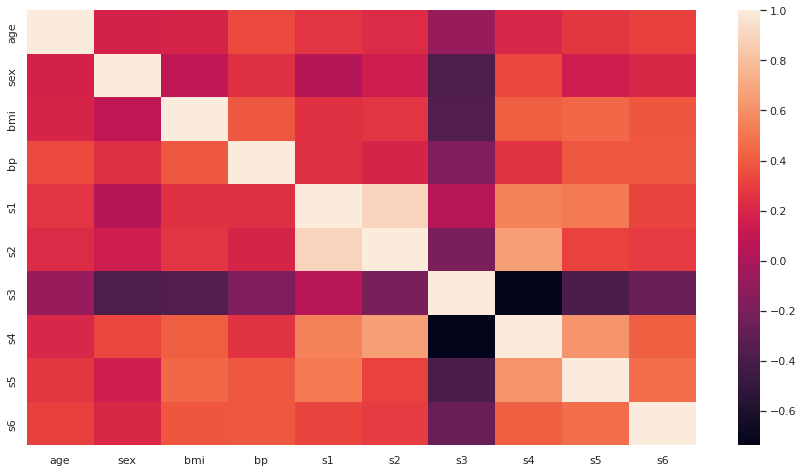

In [54]:
# evaluating the correlation between features for the features selection
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr())

In [55]:
# feature selection based on the exploratory analysis
df = df.drop(['age', 'sex','s1','s2'], axis=1)
df.head()

,bmi,bp,s3,s4,s5,s6
0,0.061696,0.021872,-0.043401,-0.002592,0.019908,-0.017646
1,-0.051474,-0.026328,0.074412,-0.039493,-0.068330,-0.092204
2,0.044451,-0.005671,-0.032356,-0.002592,0.002864,-0.025930
3,-0.011595,-0.036656,-0.036038,0.034309,0.022692,-0.009362
4,-0.036385,0.021872,0.008142,-0.002592,-0.031991,-0.046641


In [56]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size= 0.2)

Model building : 
- Choix du/des modele(s)
- Choix des metriques
- Entrainement du\des modele(s) choisis 
- Optimisation (avec GridSearch matalan)
- Learning Curves


In [57]:
# build and train the model and predict the target for the test 
model1= linear_model.LinearRegression()
model2= linear_model.Ridge(alpha= 0.4)
model1.fit(x_train, y_train)
model2.fit(x_train,y_train)
ypred1= model1.predict(x_test)
ypred2=model2.predict(x_test) 

In [58]:
# evaluating the model by calculating the metric choosen 
r21=r2_score(y_test, ypred1)
r22= r2_score(y_test, ypred2)
print(r21)
print(r22)

0.46964639141816444
0.45761690846355096


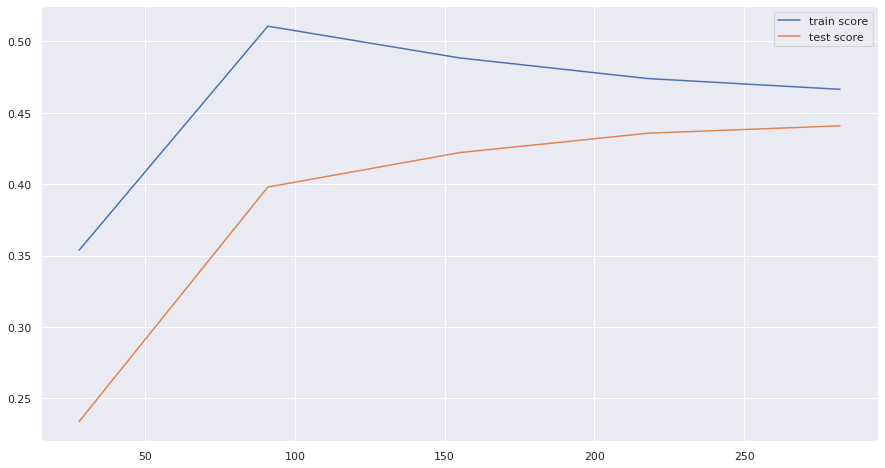

In [59]:
# detecting either the model is overfitting or not using the learning curve
N, trainscore, testscore= learning_curve(model2, x_train, y_train, cv= 5, scoring='r2')
plt.plot(N, trainscore.mean(axis=1), label='train score')
plt.plot(N, testscore.mean(axis=1), label='test score')
plt.legend()